In [1]:
#notebook dataset2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data_path = "../../ressources/Radiologists Report.csv"
data = pd.read_csv(data_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient ID         575 non-null    int64 
 1   Clinician's Notes  515 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


data.head(10)

In [4]:
data.tail(10)

,Patient ID,Clinician's Notes
565,566,NaN
566,567,L4-L5: Diffuse disc bulges noted compressing t...
567,568,LSS MRI :\nFeature of muscle spasm .\n diffus...
568,569,LSS MRI \nMutlivel diffuse disc bulges noted i...
569,570,"L3-L4, L4-L5:\nMild disc bulges noted compress..."
570,571,LSS MRI : \nwedging fractures of L2& L4 vetreb...
571,572,"L3-L4, L4-L5 AND L5-S1: Diffuse disc bulges no..."
572,573,LSS MRI : \nFeature of muscle spasm. \nPreveiu...
573,574,NaN
574,575,MRI OF THE L. SPINE \nFeature of muscle spasm....


In [5]:
data.sample(20)

,Patient ID,Clinician's Notes
443,444,LSS MRI : \nposterior central disc protrusion ...
453,454,No evidence of disc herniation.\nNo significan...
319,320,LSS MRI \nMild disc bulge noted at L4-L5 level...
475,476,LSS AND C. SPINE MRI \nFeatures of muscle spas...
252,253,Lumbosacral MRI\nDiffuse disc bulge noted at L...
396,397,LSS MRI : \nFeature of muscle spasm. \nDiffuse...
141,142,NaN
336,337,Lumbosacral MRI \nMild disc bulges noted at L4...
99,100,LSS MRI \nDiffuse disc bulge noted at L3-L4 le...
527,528,LSS MRI : \nfeatures of muscle spasm. \nMild d...


In [6]:
missing_values = data.isnull().sum()
print(missing_values)

Patient ID            0
Clinician's Notes    60
dtype: int64


In [7]:
data = data.dropna()

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

Patient ID           0
Clinician's Notes    0
dtype: int64


In [9]:
data.shape

(515, 2)

In [10]:
data.duplicated(subset="Clinician's Notes").sum()

31

In [11]:
data = data.drop_duplicates(subset="Clinician's Notes", keep='first')
data.shape

(484, 2)

In [12]:
data.dtypes

Patient ID            int64
Clinician's Notes    object
dtype: object

In [13]:
qualitative_summary = data.describe(include='object')
print("\nDescription des variables qualitatives :")
print(qualitative_summary)


Description des variables qualitatives :
                                        Clinician's Notes
count                                                 484
unique                                                484
top     MRI OF THE L. SPINE \nFeature of muscle spasm....
freq                                                    1


<Axes: xlabel="Clinician's Notes">

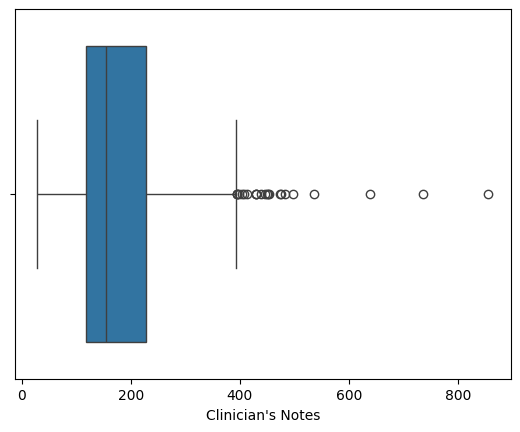

In [14]:
tmp = data["Clinician's Notes"].str.len()
sns.boxplot(x=tmp)

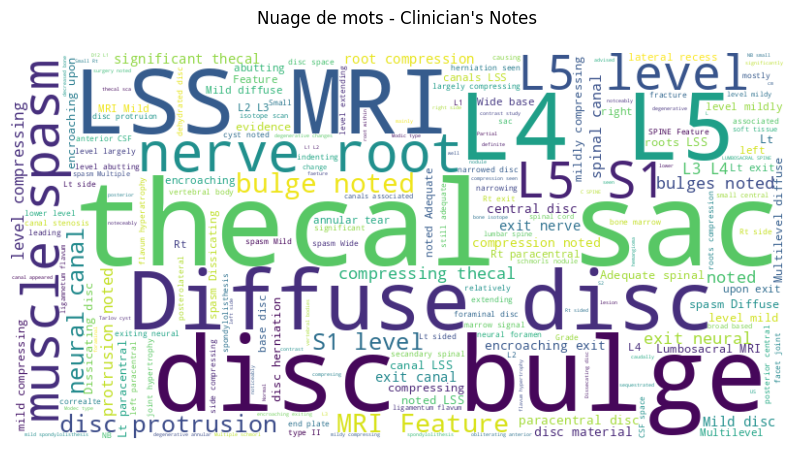

In [15]:
def generate_wordcloud(column_name, title="Nuage de mots"):
    if column_name not in data.columns:
        print(f"La colonne '{column_name}' n'existe pas dans le DataFrame.")
        return
    text = " ".join(data[column_name].dropna())
    if not text.strip():
        print(f"La colonne '{column_name}' ne contient pas de texte non vide.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} - {column_name}\n")
    plt.show()

generate_wordcloud("Clinician's Notes")

In [16]:
data = data.drop(["Patient ID"], axis=1)


In [17]:
data.to_csv("../../data/cleaned/data2_cleaned.csv",index=False)